<a href="https://www.kaggle.com/code/showri/covid-19-data-visualization-analysis?scriptVersionId=112940717" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

plt.style.use('fivethirtyeight')

df_c  = pd.read_csv('/kaggle/input/covid19-dataset/countries-aggregated.csv',parse_dates = ['Date'])
df_c.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


## Determine total cases for each row

In [2]:
df_c['Total Cases']= df_c[['Confirmed','Recovered','Deaths']].sum(axis=1)
df_c.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


## Worldwide cases grouped by date

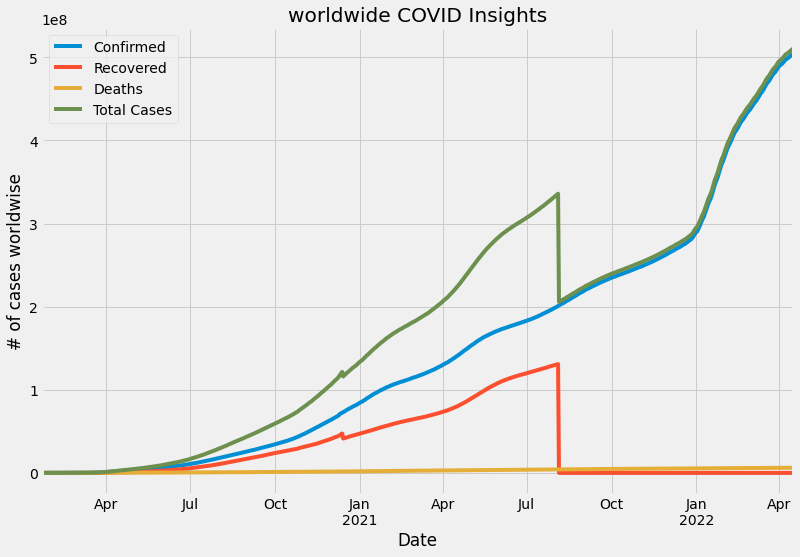

In [3]:
world_df= df_c.groupby(['Date']).sum()
w= world_df.plot(figsize=(12,8))
w.set_xlabel('Date')
w.set_ylabel('# of cases worldwise')
w.title.set_text('worldwide COVID Insights')
plt.show()

## Worldwide vs United States Total Cases

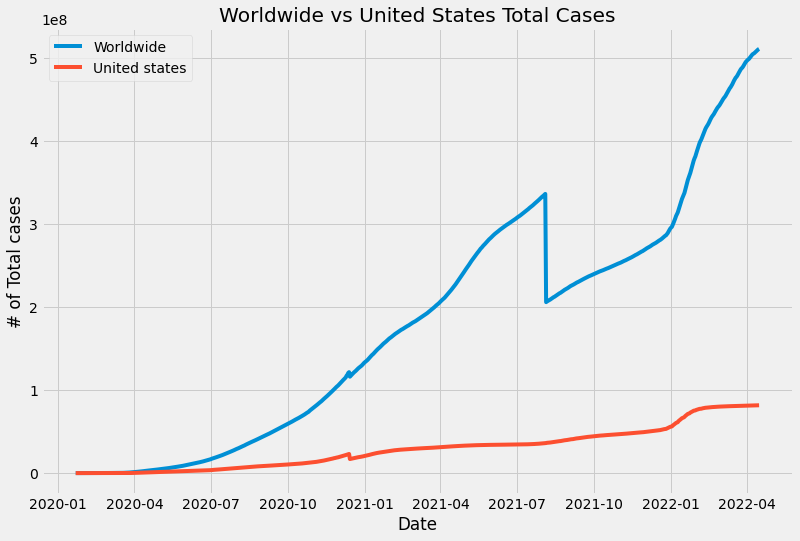

In [4]:
us_df = df_c[df_c['Country']=='US'].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
              
ax.plot(world_df[['Total Cases']],label='Worldwide')
ax.plot(us_df[['Total Cases']],label='United states')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total cases')
ax.title.set_text('Worldwide vs United States Total Cases')

plt.legend(loc='upper left')
plt.show()

## United states daily cases and deaths

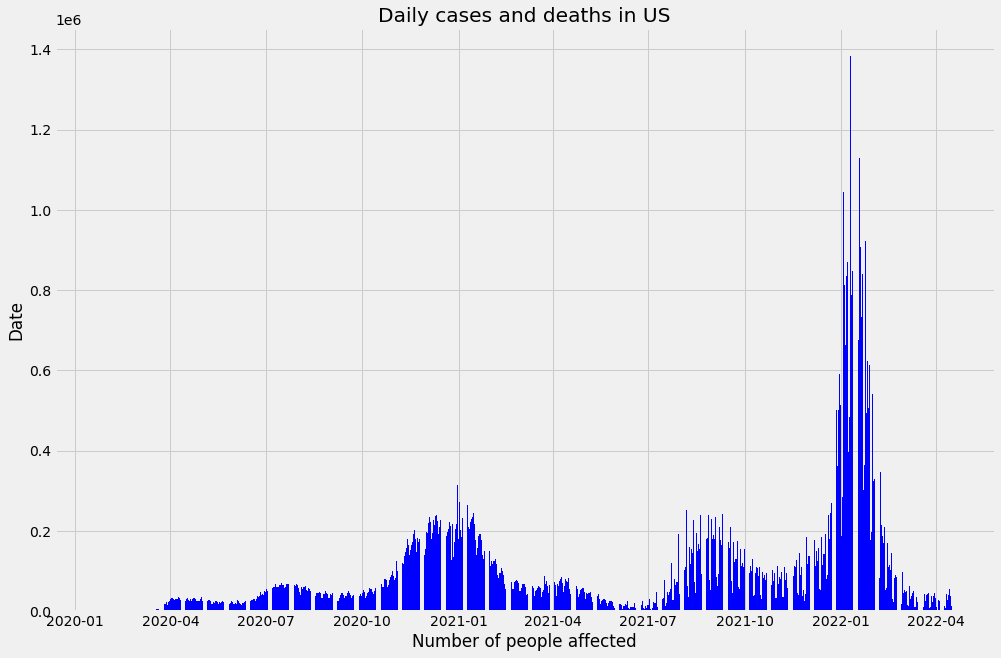

In [5]:
us_df = us_df.reset_index()
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())

fig = plt.figure(figsize=(15,10))
bx = fig.add_subplot(111)

bx.bar(us_df['Date'],us_df['Daily Confirmed'],color = 'b',label = 'US Daily Confirmed Cases')
bx.bar(us_df['Date'],us_df['Daily Deaths'],color = 'r',label = 'US Daily Deaths')
bx.set_ylabel('Date')
bx.set_xlabel('Number of people affected')
bx.title.set_text("Daily cases and deaths in US")

## Worst Hit countries by COVID-19

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


<function matplotlib.pyplot.show(close=None, block=None)>

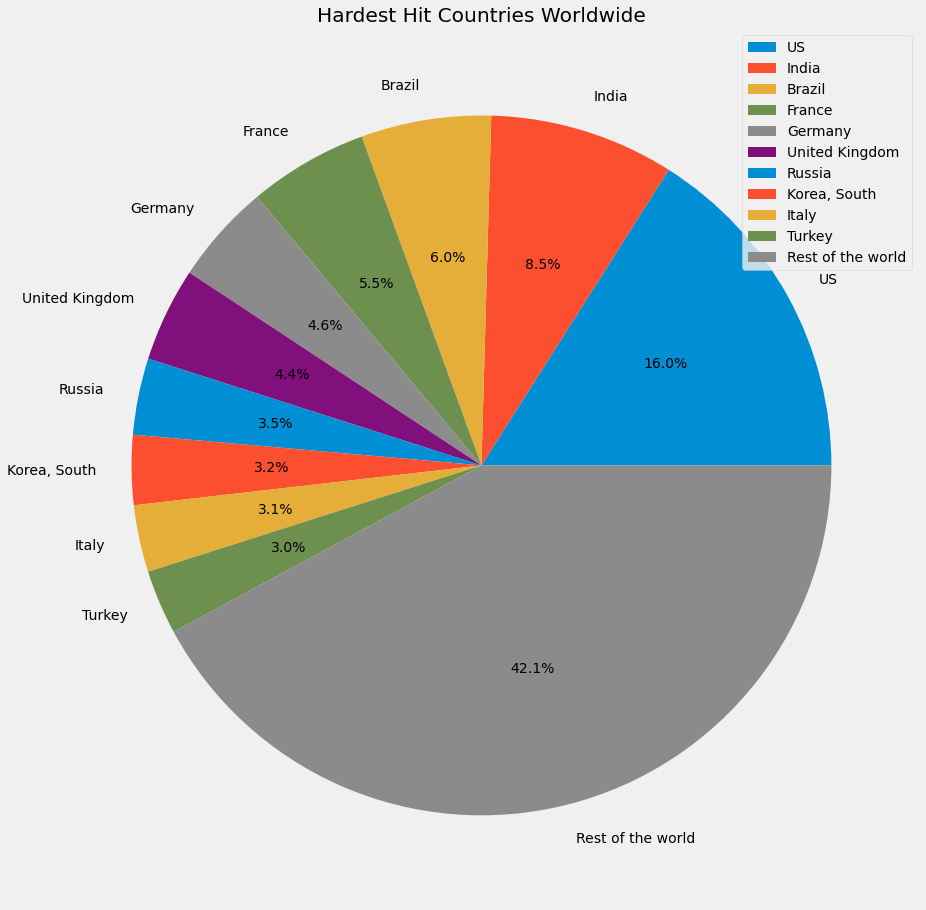

In [6]:
from datetime import date,timedelta
recent_date = df_c['Date'].max()
latest_cases_date = recent_date - timedelta(days = 1)
latest_cases_date.strftime('%Y-%m-%d')
today_df= df_c[df_c['Date']== latest_cases_date]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending= False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of the world'

fig= plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct = '%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')
plt.legend(loc='upper right')
plt.show